## Hi welcome back

well here we are again. Now it's time to try to know how would had looked Syria without the conflict. As seen in the first notebook thanks the correlations, one of the best indicators of the development of a country is the CO2 emissions. We saw in one of the plots how decreased after 2007.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt 
from scipy import stats

c:\users\usuario\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
pd.set_option("display.max_columns",1000)

In [99]:
df_bolivia = pd.read_csv('C:/Users/Usuario/Desktop/TFM/bolivia_clean.csv', index_col=0)
df_morocco = pd.read_csv('C:/Users/Usuario/Desktop/TFM/morocco_clean.csv', index_col=0)
df_syria = pd.read_csv('C:/Users/Usuario/Desktop/TFM/syria_clean.csv', index_col=0)

In [5]:
df_bolivia_subset = df_bolivia.dropna(subset=["Population_total", "CO2_emissions_(kt)"])

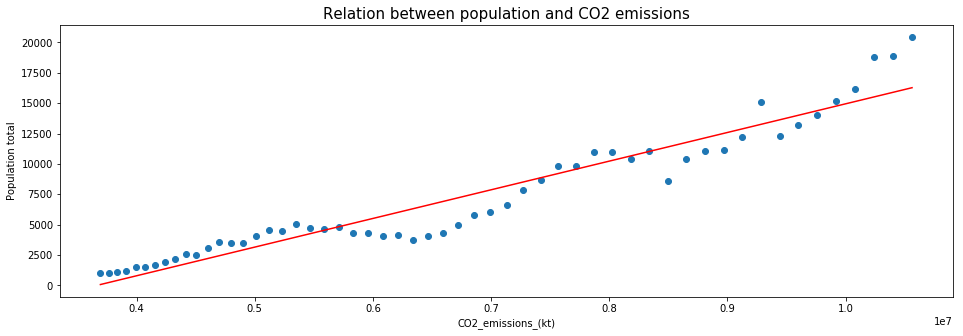

In [15]:
plt.figure(figsize=(16,5))
x = df_bolivia_subset["Population_total"]
y = df_bolivia_subset["CO2_emissions_(kt)"]

plt.scatter(x, y)

plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='red')

plt.ylabel("Population total")
plt.xlabel("CO2_emissions_(kt)")
plt.title("Relation between population and CO2 emissions", fontsize = 15)

plt.show()

Lack of the data in some indicators, not also in Syria but in Bolivia and Morocco forces us to estimate this data in order to get more accuracy. We have got no CO2 emissions since 2015 in Bolivia and Morocco.

## Bolivia

In [52]:
df_bolivia["CO2_emissions_(kt)"].tail(5)

2013    18918.053000
2014    20410.522000
2015    20154.992095
2016    20685.997318
2017    21790.117248
Name: CO2_emissions_(kt), dtype: float64

A very technique to estimate a linear model is ***Ordinary Least Squares (OLS)***

As it is defined by our very good friend (after Stackoverflow), Wikipedia, OLS is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being predicted) in the given dataset and those predicted by the linear function.
*https://en.wikipedia.org/wiki/Ordinary_least_squares*

Let's use the population to estimate CO2 emissions in Bolivia.Let's get to know a bit more our countries and introduce some ***[INTERESTING FACTS]*** of each of them and learn something about their culture. Bolivi has the tradition on the Day of the Dead to offer food to the dead because it is believed that they return home that day.

Also, Bolivia is named after Simón Bolívar, a leader in the Spanish American wars of independence.
***[INTERESTING FACTS]***


We will build the model and first check it with data we already know, the emissions in 2014

In [16]:
BOL_CO2_2014 = df_bolivia.at[2014,"CO2_emissions_(kt)"]
print('Bolivian CO2 emissions in 2014 were of %.f' %BOL_CO2_2014 + " kt")

Bolivian CO2 emissions in 2014 were of 20411 kt


In [17]:
df_bolivia['const'] = 1

In [18]:
reg_bol = sm.OLS(endog=df_bolivia['CO2_emissions_(kt)'], exog=df_bolivia[['const', 'Population_total', "Year"]], missing='drop')
type(reg_bol)

statsmodels.regression.linear_model.OLS

Built our model we will need to use .fit() to get the estimations.

In [19]:
results_bol = reg_bol.fit()
type(results_bol)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [23]:
results_bol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CO2_emissions_(kt)   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     435.1
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           3.40e-33
Time:                        20:10:42   Log-Likelihood:                -468.31
No. Observations:                  55   AIC:                             942.6
Df Residuals:                      52   BIC:                             948.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.264e+05   2.01e+05      4.617      0.000    5.24e+05    1.33e+06
Population_total     0.0061      0.001      7.598      0.000       0.004       0.008
Year              -483.0044    103.652     -4.660      0.000    -690.998    -275.011
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   0.503
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.329
Skew:                           0.143   Prob(JB):                        0.515
Kurtosis:                       2.294   Cond. No.                     8.40e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well, let's check how good predict the CO2 for 2014, that we saw above that is 20410.522.

In [28]:
print('OLS prediction for Bolivian CO2 emissions in 2014 were of %.f' %results_bol.predict(exog=[1, df_bolivia.at[2014,"Population_total"], 2014]) + " kt")

OLS prediction for Bolivian CO2 emissions in 2014 were of 17502 kt


In [29]:
first_acc = (results_bol.predict(exog=[1, df_bolivia.at[2014,"Population_total"], 2014]) - BOL_CO2_2014) / results_bol.predict(exog=[1, df_bolivia.at[2014,"Population_total"], 2014])
print('The accuracy of the regression is %.f' %(first_acc*100) + '%')

The accuracy of the regression is -17%


Mmm, not very accurate, a difference of 16,6%. Let's try again but this time adding another indicator to our regression model. Maybe bolivian GNP can help us to get more accurate values.

In [40]:
reg_bol_II = sm.OLS(endog=df_bolivia['CO2_emissions_(kt)'], exog=df_bolivia[['const', 'Population_total',"GDP_(current_US)", "Year"]], missing='drop')
results_bol_II = reg_bol_II.fit()

In [42]:
second_acc = (results_bol_II.predict(exog=[1, df_bolivia.at[2014,"Population_total"], df_bolivia.at[2014,"GDP_(current_US)"], 2014]) - BOL_CO2_2014) / results_bol_II.predict(exog=[1, df_bolivia.at[2014,"Population_total"],df_bolivia.at[2014,"GDP_(current_US)"], 2014])
print('The accuracy of the regression is %.f' %(second_acc*100) + '%')

The accuracy of the regression is -3%


Ok we accept a difference of 3%. Now we fill the cells without data and move forward to Morocco. 

In [32]:
BOL_CO2_2015 = results_bol_II.predict(exog=[1, df_bolivia.at[2015,"Population_total"], df_bolivia.at[2015,"GDP_(current_US)"], 
                                            2015])
BOL_CO2_2016 = results_bol_II.predict(exog=[1, df_bolivia.at[2016,"Population_total"], df_bolivia.at[2016,"GDP_(current_US)"], 
                                            2016])
BOL_CO2_2017 = results_bol_II.predict(exog=[1, df_bolivia.at[2017,"Population_total"], df_bolivia.at[2017,"GDP_(current_US)"], 
                                            2017])

In [33]:
df_bolivia.at[2015,"CO2_emissions_(kt)"] = BOL_CO2_2015
df_bolivia.at[2016,"CO2_emissions_(kt)"] = BOL_CO2_2016
df_bolivia.at[2017,"CO2_emissions_(kt)"] = BOL_CO2_2017

In [51]:
df_bolivia["CO2_emissions_(kt)"].tail(5)

2013    18918.053000
2014    20410.522000
2015    20154.992095
2016    20685.997318
2017    21790.117248
Name: CO2_emissions_(kt), dtype: float64

Job is done!

In Bolivia, they have very varied customs (the most known Quechua, Aymara, Guaraní) with their 36 indigenous peoples and their respective recognized languages. ***[INTERESTING FACTS]***

## Morocco

The same for our North African country, the land (and many muslim countries) where to eat with the right hand is synonim of good manners. The left hand is considered *impure* as it is for intimate hygiene.        ***[INTERESTING FACTS]***

As it worked well for Bolivia we will use the same indicators to estimate also CO2 emissions.

In [50]:
df_morocco["CO2_emissions_(kt)"].tail(5)

2013    59082.704000
2014    59863.775000
2015    59954.511380
2016    61366.062712
2017    63553.978651
Name: CO2_emissions_(kt), dtype: float64

In [36]:
df_morocco['const'] = 1

In [37]:
reg_mor = sm.OLS(endog=df_morocco['CO2_emissions_(kt)'], exog=df_morocco[['const', 'Population_total', "GDP_(current_US)", "Year"]], missing='drop')

In [38]:
results_mor = reg_mor.fit()

In [39]:
results_mor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CO2_emissions_(kt)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2414.
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           6.31e-55
Time:                        20:14:15   Log-Likelihood:                -478.88
No. Observations:                  55   AIC:                             965.8
Df Residuals:                      51   BIC:                             973.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.36e+06   6.06e+05     -2.245      0.029   -2.58e+06   -1.44e+05
Population_total    -0.0004      0.001     -0.609      0.545      -0.002       0.001
GDP_(current_US)  3.062e-07   1.82e-08     16.871      0.000     2.7e-07    3.43e-07
Year               696.7772    313.325      2.224      0.031      67.751    1325.803
==============================================================================
Omnibus:                       13.193   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.266
Skew:                           1.034   Prob(JB):                     0.000798
Kurtosis:                       4.397   Cond. No.                     1.35e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
MOR_CO2_2014 = df_morocco.at[2014,"CO2_emissions_(kt)"]
print('Moroccan CO2 emissions in 2014 were of %.f' %MOR_CO2_2014 + " kt")

Moroccan CO2 emissions in 2014 were of 59864 kt


In [45]:
acc_mor = (results_mor.predict(exog=[1, df_morocco.at[2014,"Population_total"], df_morocco.at[2014,"GDP_(current_US)"], 2014]) - MOR_CO2_2014) / results_mor.predict(exog=[1, df_morocco.at[2014,"Population_total"],df_morocco.at[2014,"GDP_(current_US)"], 2014])
print('The accuracy of the regression is %.f' %(acc_mor*100) + '%')

The accuracy of the regression is 4%


#### Nice!

In [46]:
MOR_CO2_2015 = results_mor.predict(exog=[1, df_morocco.at[2015,"Population_total"], df_morocco.at[2015,"GDP_(current_US)"], 
                                            2015])
MOR_CO2_2016 = results_mor.predict(exog=[1, df_morocco.at[2016,"Population_total"], df_morocco.at[2016,"GDP_(current_US)"], 
                                            2016])
MOR_CO2_2017 = results_mor.predict(exog=[1, df_morocco.at[2017,"Population_total"], df_morocco.at[2017,"GDP_(current_US)"], 
                                            2017])

In [47]:
df_morocco.at[2015,"CO2_emissions_(kt)"] = MOR_CO2_2015
df_morocco.at[2016,"CO2_emissions_(kt)"] = MOR_CO2_2016
df_morocco.at[2017,"CO2_emissions_(kt)"] = MOR_CO2_2017

In [49]:
df_morocco["CO2_emissions_(kt)"].tail(5)

2013    59082.704000
2014    59863.775000
2015    59954.511380
2016    61366.062712
2017    63553.978651
Name: CO2_emissions_(kt), dtype: float64

## Syria

Using this method we can predict the Syrian GDP until 2017.
As said previously, with the start of the war this indicator stopped showing data.

Let's hope that this method adjust to reality because Syrian GDP almost doubled itself from 2003 to 2007.

In Syria it is considered polite to refuse food or drink a couple of times before accepting it, but it is discourteous not to accept the offer. ***[INTERESTING FACTS]***

In [53]:
GNP_SYR_inc = (df_syria.at[2007,"GDP_(current_US)"] - df_syria.at[2003,"GDP_(current_US)"]) / df_syria.at[2003,"GDP_(current_US)"]
print('Increase of Syrian GNP between 2003 and 2007 was of %.f' %(GNP_SYR_inc*100) + '%')

Increase of Syrian GNP between 2003 and 2007 was of 85%


In [54]:
df_bolivia["Country"] = "BOL"
df_syria["Country"] = "SYR"
df_morocco["Country"] = "MAR"

In [100]:
df = pd.concat([df_bolivia, df_morocco, df_syria])

Our regression is not intelligent enough (or will it be....??) to know that in 2008 started a world financial crisis so we will compare the results using Morocco and Bolivia, that, as it is to be seen in the plot, stopped growing that fast after 2008, especially Morocco.

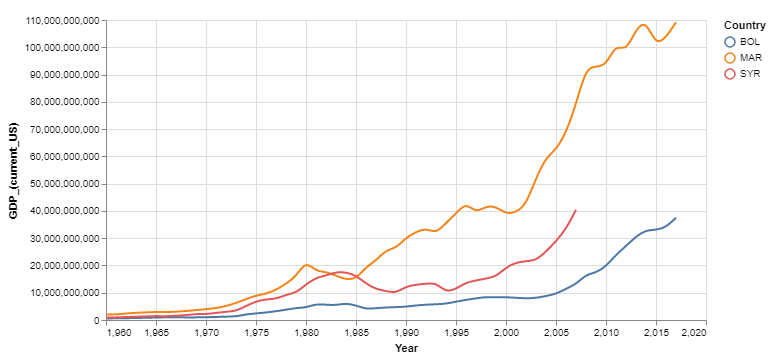

In [101]:
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=["Year"], empty='none')

line = alt.Chart().mark_line(interpolate='basis').encode(
    x="Year",
    y="GDP_(current_US)", 
    color="Country"
)

selectors = alt.Chart().mark_point().encode(x="Year", opacity=alt.value(0)).add_selection(nearest)

points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, "GDP_(current_US)", alt.value(' ')))


rules = alt.Chart().mark_rule(color='gray').encode(x="Year").transform_filter(nearest)


alt.layer(line, selectors, points, rules, text, data=df, width=600, height=300)

* **Download the notebook to play with this Altair interactive chart above and the followings**

In [64]:
df_syria[["CO2_emissions_(kt)", "GDP_(current_US)"]].tail(11)

,CO2_emissions_(kt),GDP_(current_US)
2007,66468.042,4.040501e+10
2008,67681.819,NaN
2009,62331.666,NaN
2010,61605.600,NaN
2011,56908.173,NaN
2012,44730.066,NaN
2013,36438.979,NaN
2014,30703.791,NaN
2015,NaN,NaN
2016,NaN,NaN


We will try to get GDP values through values that we already know about Syria and then check it with Bolivian and Moroccan models. For that we first need to get CO2 emissions for the last 3 years as we did withe Bolicia and Morocco. 

In [106]:
df_syria['const'] = 1

In [107]:
reg_syr_CO2 = sm.OLS(endog=df_syria['CO2_emissions_(kt)'],
                     exog=df_syria[['const', "Population_total", "Year"]],
                     missing='drop')

In [108]:
results_syr_CO2 = reg_syr_CO2.fit()

In [109]:
results_syr_CO2.predict(exog=[1, df_syria.at[2014,'Population_total'], 2014])

array([55152.44828853])

In [110]:
SYR_CO2_2015 = results_syr_CO2.predict(exog=[1, df_syria.at[2015,'Population_total'], 2015])
SYR_CO2_2016 = results_syr_CO2.predict(exog=[1, df_syria.at[2016,'Population_total'], 2016])
SYR_CO2_2017 = results_syr_CO2.predict(exog=[1, df_syria.at[2017,'Population_total'], 2017])

In [111]:
df_syria.at[2015,"CO2_emissions_(kt)"] = SYR_CO2_2015
df_syria.at[2016,"CO2_emissions_(kt)"] = SYR_CO2_2016
df_syria.at[2017,"CO2_emissions_(kt)"] = SYR_CO2_2017

Let's make a copy of our syrian data set for future predictions and  go for the GDP

In [95]:
df_syria_II = df_syria.copy()

In [71]:
reg_syr = sm.OLS(endog=df_syria['GDP_(current_US)'], exog=df_syria[['const', 'CO2_emissions_(kt)',"Population_total", "Year"]],
                 missing='drop')

In [72]:
results_syr = reg_syr.fit()

In [73]:
results_syr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       GDP_(current_US)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     58.45
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           2.17e-15
Time:                        20:24:28   Log-Likelihood:                -1129.2
No. Observations:                  48   AIC:                             2266.
Df Residuals:                      44   BIC:                             2274.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.819e+10   6.89e+11      0.099      0.922   -1.32e+12    1.46e+12
CO2_emissions_(kt)  1.935e+04   1.51e+05      0.129      0.898   -2.84e+05    3.23e+05
Population_total    1818.1672   1052.957      1.727      0.091    -303.929    3940.264
Year               -3.866e+07   3.53e+08     -0.110      0.913   -7.49e+08    6.72e+08
==============================================================================
Omnibus:                        9.220   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.445
Skew:                           0.904   Prob(JB):                       0.0147
Kurtosis:                       3.976   Cond. No.                     1.34e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This summary does not look as good as it was in the other countries. We should check it out.

In [74]:
SYR_GNP_2007 = df_syria.at[2007,"GDP_(current_US)"]
print(SYR_GNP_2007)

40405006007.20865


In [75]:
acc_syr = (results_syr.predict(exog=[1, df_syria.at[2007,'CO2_emissions_(kt)'],df_syria.at[2007,'Population_total'], 2007]) - SYR_GNP_2007) / results_syr.predict(exog=[1, df_syria.at[2007,'CO2_emissions_(kt)'],df_syria.at[2007,'Population_total'], 2007])
print('The accuracy of the regression is %.f' %(acc_syr*100) + '%')

The accuracy of the regression is -46%


It seems we are gonna have to keep working here... Let's introduce a new indicator, what do you think of the Mobille cellular subscriptions? It may be a good indicator to know our GNDP, and it had a correlation with GDP of 0,82 as we saw in the heatmap.

In [76]:
reg_syr_II = sm.OLS(endog=df_syria['GDP_(current_US)'], 
                    exog=df_syria[['const', 'CO2_emissions_(kt)',"Population_total","Mobile_cellular_subscriptions", "Year"]],
                    missing='drop')

In [77]:
results_syr_II = reg_syr_II.fit()

In [78]:
results_syr_II.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       GDP_(current_US)   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     61.27
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           2.81e-14
Time:                        20:24:56   Log-Likelihood:                -832.89
No. Observations:                  36   AIC:                             1676.
Df Residuals:                      31   BIC:                             1684.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -2.15e+12   7.39e+11     -2.908      0.007   -3.66e+12   -6.42e+11
CO2_emissions_(kt)            -7621.8293   1.15e+05     -0.067      0.947   -2.41e+05    2.26e+05
Population_total              -2238.0439   1106.698     -2.022      0.052   -4495.170      19.082
Mobile_cellular_subscriptions  3740.1583    501.791      7.454      0.000    2716.748    4763.568
Year                           1.102e+09   3.79e+08      2.910      0.007    3.29e+08    1.87e+09
==============================================================================
Omnibus:                        2.186   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.967
Skew:                           0.478   Prob(JB):                        0.374
Kurtosis:                       2.371   Cond. No.                     1.99e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
acc_syr_II = (results_syr_II.predict(exog=[1, df_syria.at[2007,'CO2_emissions_(kt)'],df_syria.at[2007,'Population_total'], df_syria.at[2007,'Mobile_cellular_subscriptions'], 2007]) - SYR_GNP_2007) / results_syr_II.predict(exog=[1, df_syria.at[2007,'CO2_emissions_(kt)'],df_syria.at[2007,'Population_total'], df_syria.at[2007,'Mobile_cellular_subscriptions'], 2007])

print('The accuracy of the regression is %.f' %(acc_syr_II*100) + '%')

The accuracy of the regression is -2%


#### Not that bad

In [83]:
SYR_GDP_2008 = results_syr_II.predict(exog=[1, df_syria.at[2008,'CO2_emissions_(kt)'],
                                            df_syria.at[2008,'Population_total'], 
                                            df_syria.at[2008,'Mobile_cellular_subscriptions'], 2008])                                         
SYR_GDP_2009 = results_syr_II.predict(exog=[1, df_syria.at[2009,'CO2_emissions_(kt)'],
                                            df_syria.at[2009,'Population_total'], 
                                            df_syria.at[2000,'Mobile_cellular_subscriptions'], 2009])                                     
SYR_GDP_2010 = results_syr_II.predict(exog=[1, df_syria.at[2010,'CO2_emissions_(kt)'],
                                            df_syria.at[2010,'Population_total'], 
                                            df_syria.at[2010,'Mobile_cellular_subscriptions'], 2010])
SYR_GDP_2011 = results_syr_II.predict(exog=[1, df_syria.at[2011,'CO2_emissions_(kt)'],
                                            df_syria.at[2011,'Population_total'], 
                                            df_syria.at[2011,'Mobile_cellular_subscriptions'], 2011])
SYR_GDP_2012 = results_syr_II.predict(exog=[1, df_syria.at[2012,'CO2_emissions_(kt)'],
                                            df_syria.at[2012,'Population_total'], 
                                            df_syria.at[2012,'Mobile_cellular_subscriptions'], 2012])
SYR_GDP_2013 = results_syr_II.predict(exog=[1, df_syria.at[2013,'CO2_emissions_(kt)'],
                                            df_syria.at[2013,'Population_total'], 
                                            df_syria.at[2013,'Mobile_cellular_subscriptions'], 2013])
SYR_GDP_2014 = results_syr_II.predict(exog=[1, df_syria.at[2014,'CO2_emissions_(kt)'],
                                            df_syria.at[2014,'Population_total'], 
                                            df_syria.at[2014,'Mobile_cellular_subscriptions'], 2014])
SYR_GDP_2015 = results_syr_II.predict(exog=[1, df_syria.at[2015,'CO2_emissions_(kt)'],
                                            df_syria.at[2015,'Population_total'], 
                                            df_syria.at[2015,'Mobile_cellular_subscriptions'], 2015])
SYR_GDP_2016 = results_syr_II.predict(exog=[1, df_syria.at[2016,'CO2_emissions_(kt)'],
                                            df_syria.at[2016,'Population_total'], 
                                            df_syria.at[2016,'Mobile_cellular_subscriptions'], 2016])
SYR_GDP_2017 = results_syr_II.predict(exog=[1, df_syria.at[2017,'CO2_emissions_(kt)'],
                                            df_syria.at[2017,'Population_total'], 
                                            df_syria.at[2017,'Mobile_cellular_subscriptions'], 2017])

In [96]:
df_syria_II.at[2008,"GDP_(current_US)"] = SYR_GDP_2008
df_syria_II.at[2009,"GDP_(current_US)"] = SYR_GDP_2009
df_syria_II.at[2010,"GDP_(current_US)"] = SYR_GDP_2010
df_syria_II.at[2011,"GDP_(current_US)"] = SYR_GDP_2011
df_syria_II.at[2012,"GDP_(current_US)"] = SYR_GDP_2012
df_syria_II.at[2013,"GDP_(current_US)"] = SYR_GDP_2013
df_syria_II.at[2014,"GDP_(current_US)"] = SYR_GDP_2014
df_syria_II.at[2015,"GDP_(current_US)"] = SYR_GDP_2015
df_syria_II.at[2016,"GDP_(current_US)"] = SYR_GDP_2016
df_syria_II.at[2017,"GDP_(current_US)"] = SYR_GDP_2017

should we have a look to what would have happened then...?

In [97]:
df_first_regression = pd.concat([df_bolivia, df_morocco, df_syria_II])

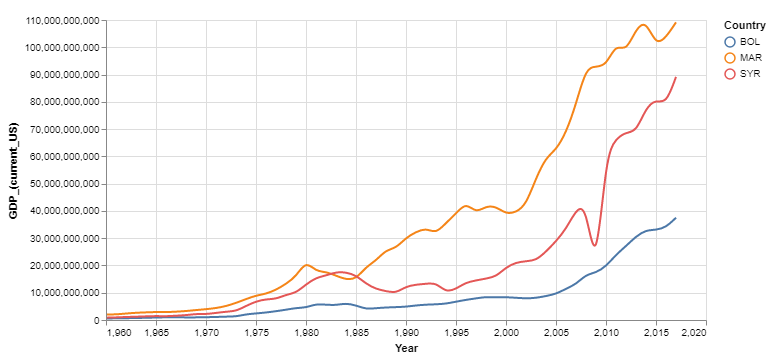

In [98]:
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=["Year"], empty='none')

line = alt.Chart().mark_line(interpolate='basis').encode(
    x="Year",
    y="GDP_(current_US)", 
    color="Country"
)

selectors = alt.Chart().mark_point().encode(x="Year", opacity=alt.value(0)).add_selection(nearest)

points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, "GDP_(current_US)", alt.value(' ')))


rules = alt.Chart().mark_rule(color='gray').encode(x="Year").transform_filter(nearest)


alt.layer(line, selectors, points, rules, text, data=df_first_regression, width=600, height=300)

And this is how Syria would have evolved using its own indicators. Very interesting how our regression predicts the financial crisis, but this may rely on the fall in the population after the conflict. Even so, huge fall during the financial crisis but afterwards the country recovers and grows at a rate similar to Morocco and much faster than Bolivia.

In [88]:
print('The GDP in Syria in 2017 could have been %.f' %(SYR_GDP_2017) + '$ if the conflict would had never taken place')

The GDP in Syria in 2017 could have been 89153929016$ if the conflict would had never taken place


##### Syria would have grown over countries such as Estonia or Croatia, and end up the year very close to the Slovak Republic.

Now that we have been able to put some extra data fo our data frames let's simply get to our main objective, that was "predict" the situation for Syria in those years after the begin of the conflict, but otherwise.

## How are we going to do it?

As we saw in the first Notebook of Data_treatment, and inside a frame with thousands of economical or cultural pecualirities that make the difference between these and all the countries in the world, Bolivia's and Morocco's evolution, development and situation at the moment when the conflict start are similar to Syria.

That's why we are trying to use its data for our model.

In [89]:
df_syria.at[2014,"GDP_(current_US)"]

77894431169.27246

We will use our master df, that now contains the data of the three countries and their CO2 emissions.

In [102]:
df['const'] = 1

In [112]:
reg_TOTAL = sm.OLS(endog=df['GDP_(current_US)'], 
                     exog=df[['const', 'CO2_emissions_(kt)', "Population_total", "Mobile_cellular_subscriptions", "Year"]],
                     missing='drop')

In [113]:
results_reg_TOTAL = reg_TOTAL.fit()

In [114]:
results_reg_TOTAL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       GDP_(current_US)   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     803.5
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           4.77e-84
Time:                        20:40:22   Log-Likelihood:                -2885.3
No. Observations:                 122   AIC:                             5781.
Df Residuals:                     117   BIC:                             5795.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -2.283e+11   8.41e+10     -2.716      0.008   -3.95e+11   -6.18e+10
CO2_emissions_(kt)             9.643e+04   3.71e+04      2.597      0.011    2.29e+04     1.7e+05
Population_total               1204.8914     68.777     17.519      0.000    1068.682    1341.101
Mobile_cellular_subscriptions  1595.7347     64.281     24.824      0.000    1468.429    1723.040
Year                           1.126e+08   4.24e+07      2.656      0.009    2.86e+07    1.97e+08
==============================================================================
Omnibus:                        2.340   Durbin-Watson:                   0.362
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                1.837
Skew:                           0.275   Prob(JB):                        0.399
Kurtosis:                       3.242   Cond. No.                     3.74e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have thrown Syrian data to the model with the three countries. We will see later in the line chart how well this worked.

Now a new try using just Bolivia & Morocco.

In [116]:
df_bm = pd.concat([df_bolivia, df_morocco])

In [117]:
df_bm['const'] = 1

In [118]:
reg_TOTAL_II = sm.OLS(endog=df_bm['GDP_(current_US)'], 
                     exog=df_bm[['const', 'CO2_emissions_(kt)', "Population_total", "Mobile_cellular_subscriptions", "Year"]],
                     missing='drop')

In [119]:
results_reg_TOTAL_II = reg_TOTAL_II.fit()

Let's create two new dataframes and fill Country column for the next visualization.

In [121]:
df_reg_TOTAL = df_syria[["GDP_(current_US)", "Country"]].copy()
df_reg_TOTAL_BM = df_syria[["GDP_(current_US)", "Country"]].copy()

In [132]:
df_reg_TOTAL["Country"] = "3 countries OLS"
df_reg_TOTAL_BM["Country"] = "Just Bol&Mor OLS"
df_reg_TOTAL["Year"] = df_reg_TOTAL.index
df_reg_TOTAL_BM["Year"] = df_reg_TOTAL_BM.index

In [123]:
df_reg_TOTAL.tail(5)

,GDP_(current_US),Country,Year
2013,NaN,reg_TOTAL,2013
2014,NaN,reg_TOTAL,2014
2015,NaN,reg_TOTAL,2015
2016,NaN,reg_TOTAL,2016
2017,NaN,reg_TOTAL,2017


No data yet, down comes the monster.

In [141]:
SYR_GDP_2008_Total = results_reg_TOTAL.predict(exog=[1, df_syria.at[2008,'CO2_emissions_(kt)'],
                                            df_syria.at[2008,'Population_total'], 
                                            df_syria.at[2008,'Mobile_cellular_subscriptions'], 2008])                                         
SYR_GDP_2009_Total = results_reg_TOTAL.predict(exog=[1, df_syria.at[2009,'CO2_emissions_(kt)'],
                                            df_syria.at[2009,'Population_total'], 
                                            df_syria.at[2009,'Mobile_cellular_subscriptions'], 2009])                                     
SYR_GDP_2010_Total = results_reg_TOTAL.predict(exog=[1, df_syria.at[2010,'CO2_emissions_(kt)'],
                                            df_syria.at[2010,'Population_total'], 
                                            df_syria.at[2010,'Mobile_cellular_subscriptions'], 2010])
SYR_GDP_2011_Total = results_reg_TOTAL.predict(exog=[1, df_syria.at[2011,'CO2_emissions_(kt)'],
                                            df_syria.at[2011,'Population_total'], 
                                            df_syria.at[2011,'Mobile_cellular_subscriptions'], 2011])
SYR_GDP_2012_Total = results_reg_TOTAL.predict(exog=[1, df_syria.at[2012,'CO2_emissions_(kt)'],
                                            df_syria.at[2012,'Population_total'], 
                                            df_syria.at[2012,'Mobile_cellular_subscriptions'], 2012])
SYR_GDP_2013_Total = results_reg_TOTAL.predict(exog=[1, df_syria.at[2013,'CO2_emissions_(kt)'],
                                            df_syria.at[2013,'Population_total'], 
                                            df_syria.at[2013,'Mobile_cellular_subscriptions'], 2013])
SYR_GDP_2014_Total = results_reg_TOTAL.predict(exog=[1, df_syria.at[2014,'CO2_emissions_(kt)'],
                                            df_syria.at[2014,'Population_total'], 
                                            df_syria.at[2014,'Mobile_cellular_subscriptions'], 2014])
SYR_GDP_2015_Total = results_reg_TOTAL.predict(exog=[1, df_syria.at[2015,'CO2_emissions_(kt)'],
                                            df_syria.at[2015,'Population_total'], 
                                            df_syria.at[2015,'Mobile_cellular_subscriptions'], 2015])
SYR_GDP_2016_Total = results_reg_TOTAL.predict(exog=[1, df_syria.at[2016,'CO2_emissions_(kt)'],
                                            df_syria.at[2016,'Population_total'], 
                                            df_syria.at[2016,'Mobile_cellular_subscriptions'], 2016])
SYR_GDP_2017_Total = results_reg_TOTAL.predict(exog=[1, df_syria.at[2017,'CO2_emissions_(kt)'],
                                            df_syria.at[2017,'Population_total'], 
                                            df_syria.at[2017,'Mobile_cellular_subscriptions'], 2017])



SYR_GDP_2008_Total_BM = results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2008,'CO2_emissions_(kt)'],
                                            df_syria.at[2008,'Population_total'], 
                                            df_syria.at[2008,'Mobile_cellular_subscriptions'], 2008])                                         
SYR_GDP_2009_Total_BM = results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2009,'CO2_emissions_(kt)'],
                                            df_syria.at[2009,'Population_total'], 
                                            df_syria.at[2009,'Mobile_cellular_subscriptions'], 2009])                                     
SYR_GDP_2010_Total_BM = results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2010,'CO2_emissions_(kt)'],
                                            df_syria.at[2010,'Population_total'], 
                                            df_syria.at[2010,'Mobile_cellular_subscriptions'], 2010])
SYR_GDP_2011_Total_BM = results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2011,'CO2_emissions_(kt)'],
                                            df_syria.at[2011,'Population_total'], 
                                            df_syria.at[2011,'Mobile_cellular_subscriptions'], 2011])
SYR_GDP_2012_Total_BM = results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2012,'CO2_emissions_(kt)'],
                                            df_syria.at[2012,'Population_total'], 
                                            df_syria.at[2012,'Mobile_cellular_subscriptions'], 2012])
SYR_GDP_2013_Total_BM = results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2013,'CO2_emissions_(kt)'],
                                            df_syria.at[2013,'Population_total'], 
                                            df_syria.at[2013,'Mobile_cellular_subscriptions'], 2013])
SYR_GDP_2014_Total_BM = results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2014,'CO2_emissions_(kt)'],
                                            df_syria.at[2014,'Population_total'], 
                                            df_syria.at[2014,'Mobile_cellular_subscriptions'], 2014])
SYR_GDP_2015_Total_BM = results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2015,'CO2_emissions_(kt)'],
                                            df_syria.at[2015,'Population_total'], 
                                            df_syria.at[2015,'Mobile_cellular_subscriptions'], 2015])
SYR_GDP_2016_Total_BM = results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2016,'CO2_emissions_(kt)'],
                                            df_syria.at[2016,'Population_total'], 
                                            df_syria.at[2016,'Mobile_cellular_subscriptions'], 2016])
SYR_GDP_2017_Total_BM = results_reg_TOTAL_II.predict(exog=[1, df_syria.at[2017,'CO2_emissions_(kt)'],
                                            df_syria.at[2017,'Population_total'], 
                                            df_syria.at[2017,'Mobile_cellular_subscriptions'], 2017])

In [142]:
df_reg_TOTAL.at[2008,"GDP_(current_US)"] = SYR_GDP_2008_Total
df_reg_TOTAL.at[2009,"GDP_(current_US)"] = SYR_GDP_2009_Total
df_reg_TOTAL.at[2010,"GDP_(current_US)"] = SYR_GDP_2010_Total
df_reg_TOTAL.at[2011,"GDP_(current_US)"] = SYR_GDP_2011_Total
df_reg_TOTAL.at[2012,"GDP_(current_US)"] = SYR_GDP_2012_Total
df_reg_TOTAL.at[2013,"GDP_(current_US)"] = SYR_GDP_2013_Total
df_reg_TOTAL.at[2014,"GDP_(current_US)"] = SYR_GDP_2014_Total
df_reg_TOTAL.at[2015,"GDP_(current_US)"] = SYR_GDP_2015_Total
df_reg_TOTAL.at[2016,"GDP_(current_US)"] = SYR_GDP_2016_Total
df_reg_TOTAL.at[2017,"GDP_(current_US)"] = SYR_GDP_2017_Total


df_reg_TOTAL_BM.at[2008,"GDP_(current_US)"] = SYR_GDP_2008_Total_BM
df_reg_TOTAL_BM.at[2009,"GDP_(current_US)"] = SYR_GDP_2009_Total_BM
df_reg_TOTAL_BM.at[2010,"GDP_(current_US)"] = SYR_GDP_2010_Total_BM
df_reg_TOTAL_BM.at[2011,"GDP_(current_US)"] = SYR_GDP_2011_Total_BM
df_reg_TOTAL_BM.at[2012,"GDP_(current_US)"] = SYR_GDP_2012_Total_BM
df_reg_TOTAL_BM.at[2013,"GDP_(current_US)"] = SYR_GDP_2013_Total_BM
df_reg_TOTAL_BM.at[2014,"GDP_(current_US)"] = SYR_GDP_2014_Total_BM
df_reg_TOTAL_BM.at[2015,"GDP_(current_US)"] = SYR_GDP_2015_Total_BM
df_reg_TOTAL_BM.at[2016,"GDP_(current_US)"] = SYR_GDP_2016_Total_BM
df_reg_TOTAL_BM.at[2017,"GDP_(current_US)"] = SYR_GDP_2017_Total_BM

We will put all this data in just one df, our final version to get to see it clearer in our already beloved line chart.

In [143]:
df_FV = pd.concat([df_first_regression, df_reg_TOTAL, df_reg_TOTAL_BM])

c:\users\usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


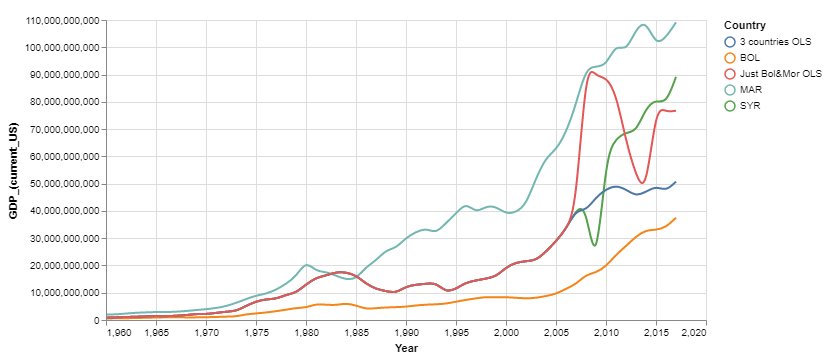

In [144]:
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=["Year"], empty='none')

line = alt.Chart().mark_line(interpolate='basis').encode(
    x="Year",
    y="GDP_(current_US)", 
    color="Country"
)

selectors = alt.Chart().mark_point().encode(x="Year", opacity=alt.value(0)).add_selection(nearest)

points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, "GDP_(current_US)", alt.value(' ')))


rules = alt.Chart().mark_rule(color='gray').encode(x="Year").transform_filter(nearest)


alt.layer(line, selectors, points, rules, text, data=df_FV, width=600, height=300)

We found the end of the road here.

OLS using just Morocco and Bolivia behave a bit weird, growing really fast in the first years but falling strongly after 2013 to again recover and keep stable. I would not say this is a very accurate prediction.

The OLS using Syria, Morocco and Bolivia is the one that appears to be more stabil and ajusted to how a country would grow in standard conditions.